# Logistic Regression model (Algerian Forest Fires)

### Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)

### Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely fire and not fire

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data
data=pd.read_csv('E:\datascience\my cls\Dataset\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

## Cleansing the data

In [3]:
#adding the column for region
data['Region']=0
data['Region'][122:]=1

In [4]:
#deleting the scrap rows
data[122:]
data[data['FWI']=='fire   ']
data.drop(index=[122,123,167], inplace=True)

In [5]:
#reset index and columns
data=data.reset_index(drop=True)
data.columns = data.columns.str.strip ()

In [6]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [7]:
data.shape

(243, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [9]:
#encoding the Classes to integer
data['Classes']=data['Classes'].str.strip().map({'not fire':0,'fire':1})

In [10]:
data['Classes'].unique()

array([0, 1], dtype=int64)

In [11]:
#converting onject to int /float 
for i in data.columns: data[i]=data[i].astype(float)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    float64
 14  Region       243 non-null    float64
dtypes: float64(15)
memory usage: 28.6 KB


In [13]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [14]:
# the columns Rain,DMC ,DC seems to have more outliers

In [15]:
#checking null values:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
data.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734


In [17]:
#droping year as it is same
data.drop(columns=['year'],inplace=True)

### Plotting the correlation

<AxesSubplot:>

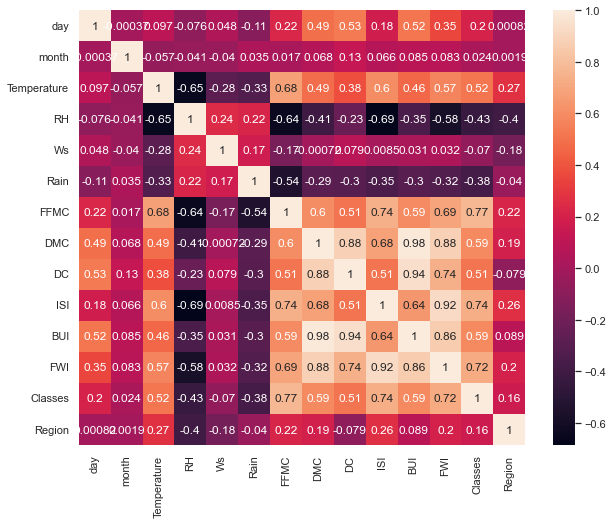

In [18]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.corr(), annot=True)

There seems to be more correlation between
* DC & BUI
* DMC & BUI
* ISI & FWI


Dropping BUI as it has 98% correlation with dc

In [19]:
data.drop('BUI',axis=1, inplace=True)

<AxesSubplot:>

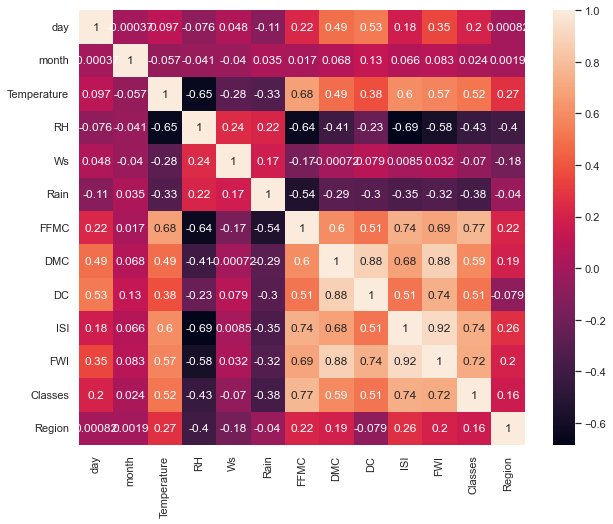

In [20]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data.corr(), annot=True)

the correlation seems to be reduced

#### checking if the data is Balanced/ Imbalanced

<AxesSubplot:xlabel='Classes', ylabel='count'>

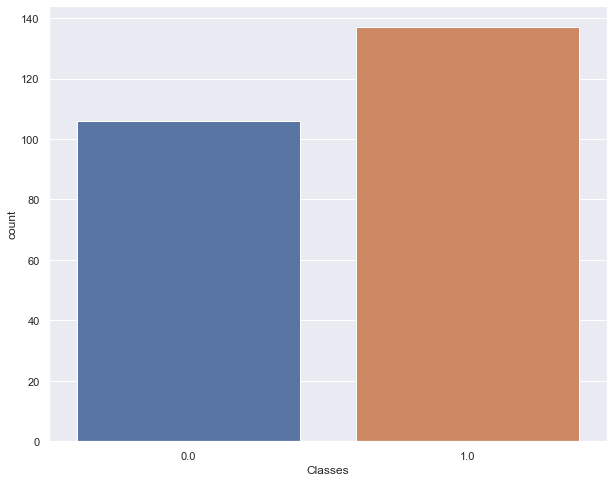

In [21]:
sns.countplot(x="Classes",data=data)

Data is a Balanced data

finding the outliers

<AxesSubplot:>

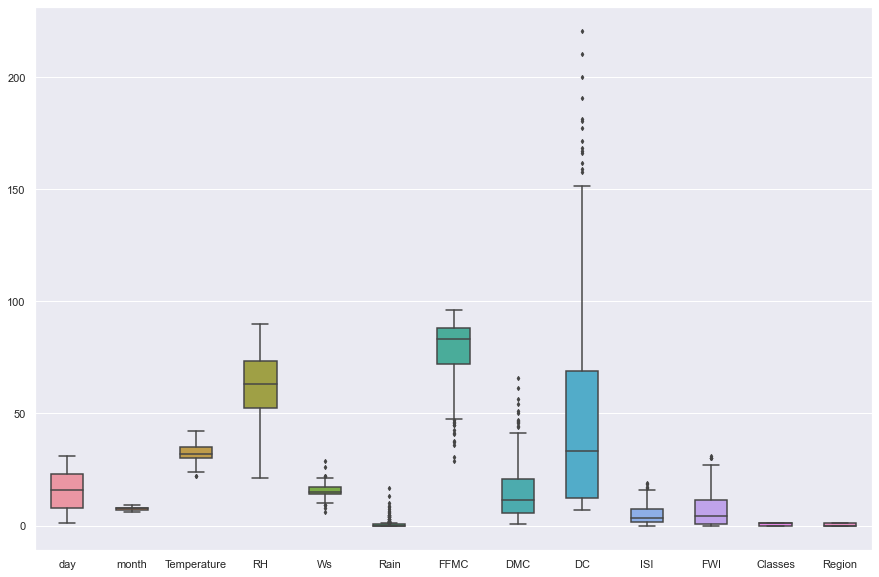

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

We have outliers in Rain, DMC, DC , But the size of data set is low .So we cannot remove data for Rain

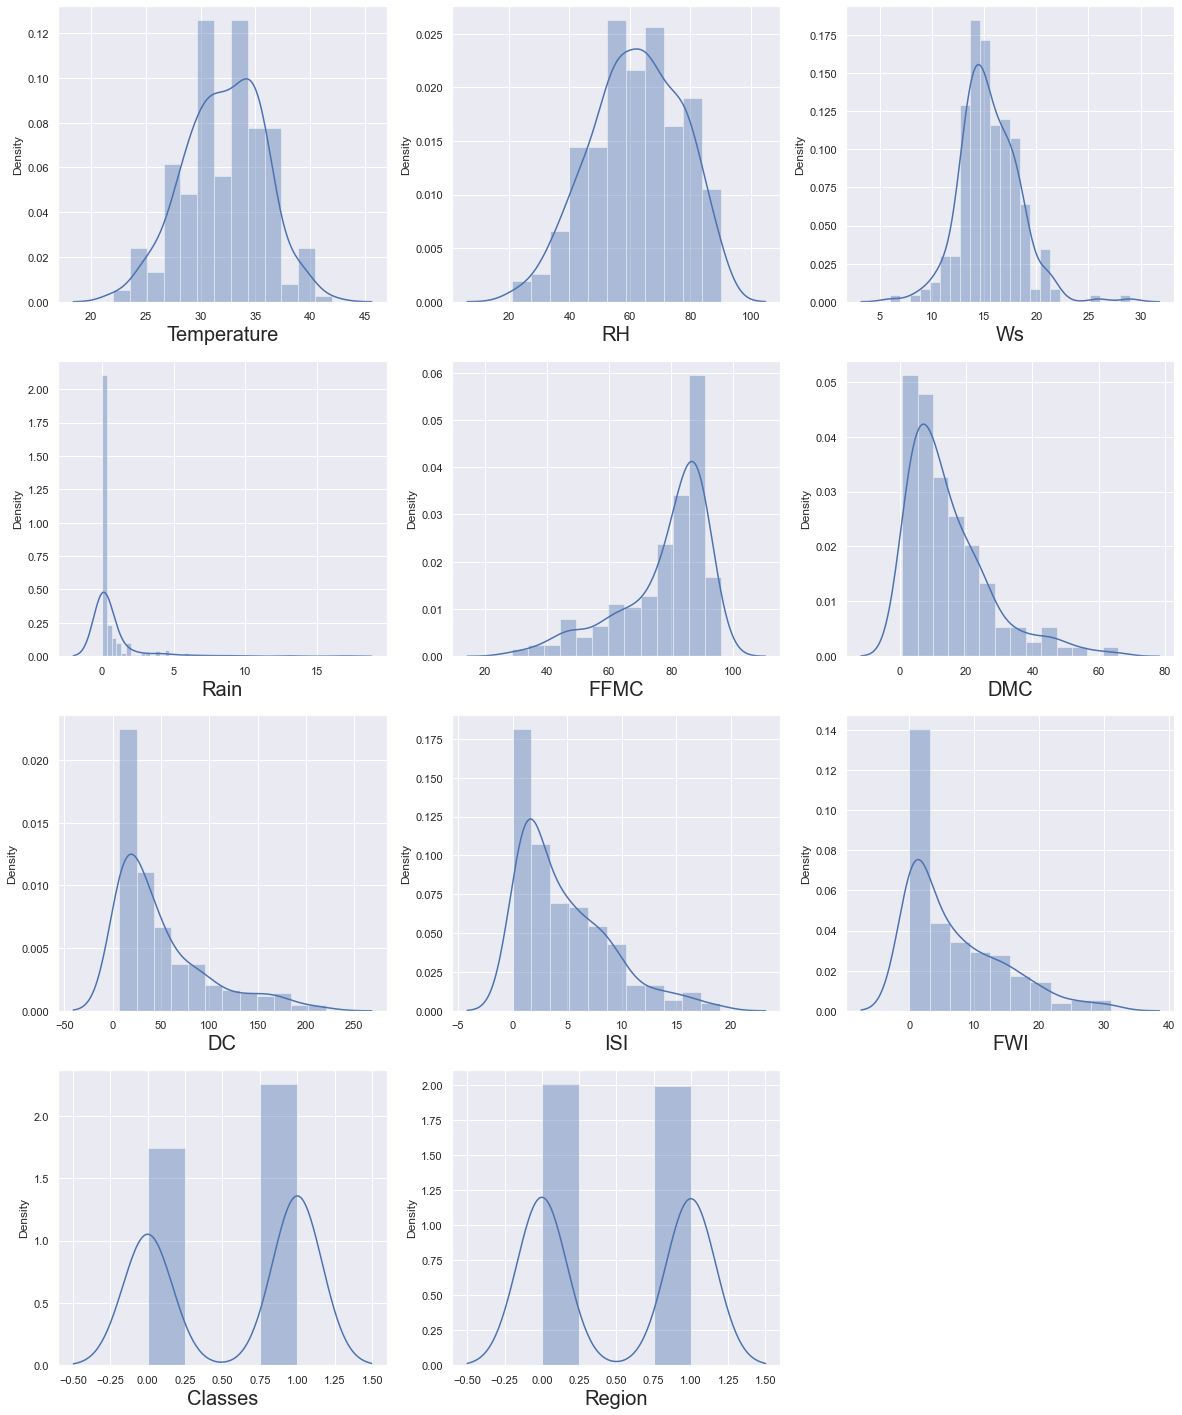

In [23]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.drop(columns=['day','month']):
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

our data seems to  normally distributedfor some columns and Skewed for some columns like FFMC,DMC,DC.But the data set is small So we will build the model and check accordingly

In [24]:
X = data.drop(columns = ['Classes'])
y = data['Classes']

### Relation Between independent and dependent features

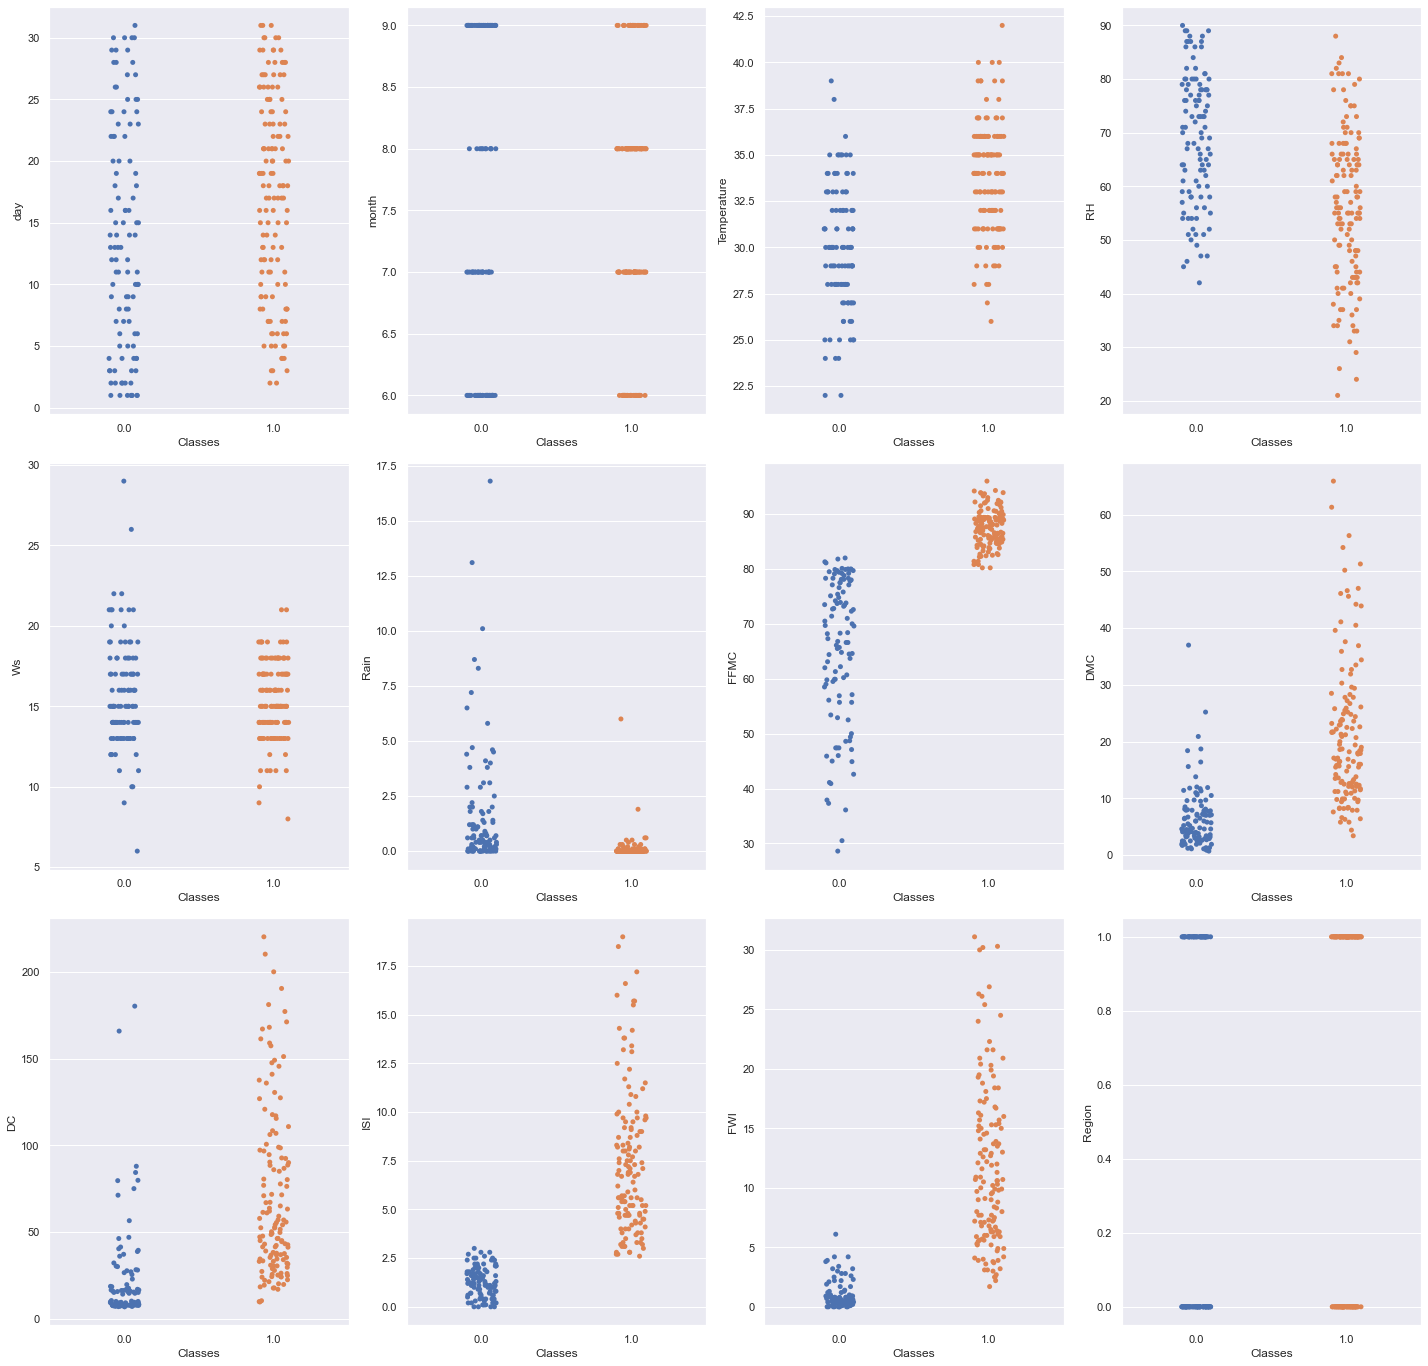

In [25]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<= 15:
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [26]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,6.080458,day
1,40.107874,month
2,103.721666,Temperature
3,34.557693,RH
4,35.100141,Ws
5,1.712122,Rain
6,107.236843,FFMC
7,33.177637,DMC
8,14.549678,DC
9,51.307729,ISI


Train-test split of the data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=40)

## Feature Transformation

In [28]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test= scalar.fit_transform(X_test)

In [29]:
X_train.shape

(182, 12)

In [30]:
X_test.shape

(61, 12)

### plotting for outliers after the transformation

<AxesSubplot:>

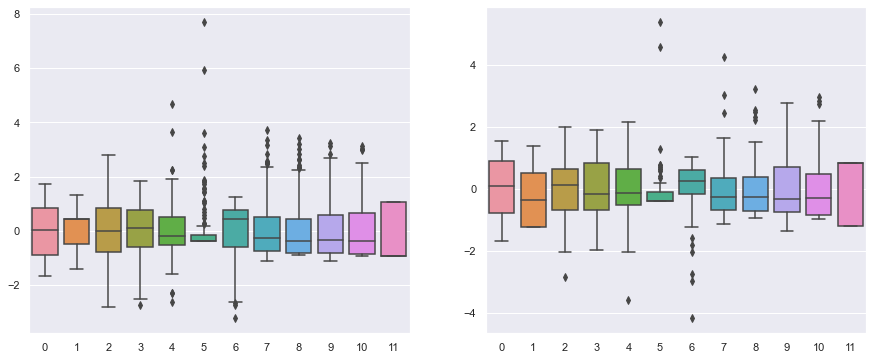

In [31]:
plt.figure(figsize=(15,6), facecolor='white')
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_test)


### Model Training

In [32]:

log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

### Loading the scaler data and model in to pickle files

In [33]:
import pickle
# Writing different model files to file
with open( 'LogisticregmodelPred.pkl', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.pkl', 'wb') as f:
    pickle.dump(scalar,f)


In [34]:
with open('LogisticregmodelPred.pkl', 'rb') as f:
    log_reg = pickle.load(f)

In [35]:
y_pred = log_reg.predict(X_test)

### Preformance of the model

In [36]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9672131147540983

In [37]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[25,  0],
       [ 2, 34]], dtype=int64)

In [38]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [39]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9672131147540983

In [40]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [41]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9259259259259259

In [42]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9615384615384615

In [43]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.9722222222222222

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

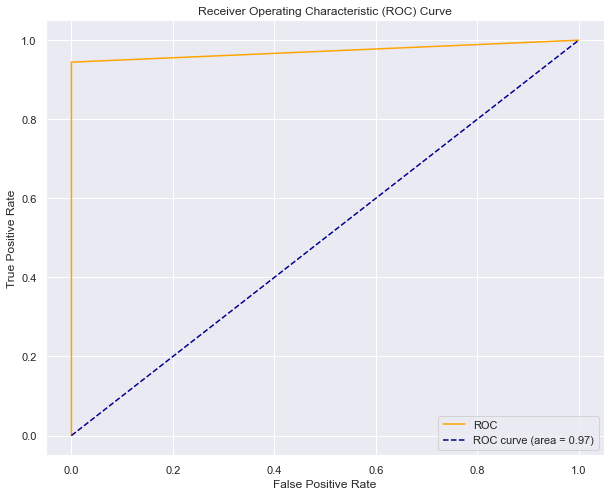

In [45]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()